<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20211227_DataFrame_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request #웹에 접근하기 위한 모듈
from bs4 import BeautifulSoup as bs 

In [5]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
    # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [6]:
df = pd.read_csv("규모별_미분양현황_20211227090417.csv", encoding='cp949').sort_values('시점', ascending=True)

In [7]:
df_seoul = df.groupby('시도(1)').get_group('서울')

In [8]:
df_gnam = df.groupby('시도(1)').get_group('경남').sort_values('시점', ascending=True).reset_index(drop=True)

In [9]:
df_gnam

,시도(1),부문(1),규모(1),시점,데이터
0,경남,민간부문,60∼85㎡,2015. 01,2398
1,경남,민간부문,60∼85㎡,2015. 02,2142
2,경남,민간부문,60∼85㎡,2015. 03,1739
3,경남,민간부문,60∼85㎡,2015. 04,1459
4,경남,민간부문,60∼85㎡,2015. 05,1484
...,...,...,...,...,...
77,경남,민간부문,60∼85㎡,2021. 06,2426
78,경남,민간부문,60∼85㎡,2021. 07,2243
79,경남,민간부문,60∼85㎡,2021. 08,1904
80,경남,민간부문,60∼85㎡,2021. 09,1485


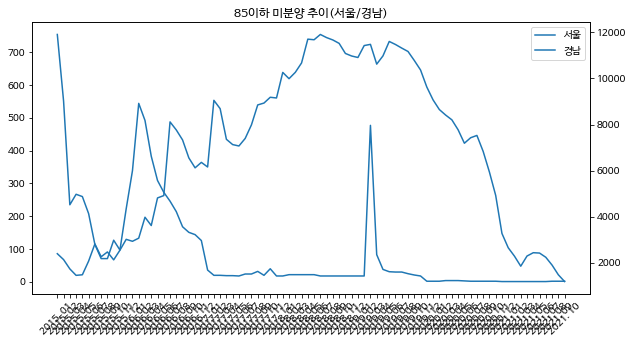

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("85이하 미분양 추이(서울/경남)")

### x축 rotaiton 방법 2가지 중 택1###
plt.xticks(rotation=45)
# fig.autofmt_xdate(rotation=45) # 회전후, 우측자동정렬

# 1. 서울 그래프
ax.plot(df_seoul['시점'], df_seoul['데이터'], label='서울')


# 2. 경남 그래프
ax2 = ax.twinx() # 서울 그래프의 x축 공유(우측 y축 사용됨)
ax2.plot(df_gnam['시점'], df_gnam['데이터'], label='경남')


# 
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

In [11]:
df_seoul['데이터'].astype('string') + '명'

81    754명
80    551명
79    235명
78    267명
77    260명
      ... 
4       1명
3       1명
2       2명
1       2명
0       2명
Name: 데이터, Length: 82, dtype: string

# DataFrame은 for문을 통해 col명을 반환

In [12]:
for df_col_name in df_seoul:
  print(df_col_name)

시도(1)
부문(1)
규모(1)
시점
데이터


# DataFrame을 각 행 단위로 반환하고 싶다면
## df.iterrows() 사용 : 제너레이터를 반환하며 for문을 통해 index 및 각 행을 반환

In [13]:
for index, row in df_seoul.iterrows():
  print(index, row[0], row[1], row[2], row[3], row[4])
  break

81 서울 민간부문 60∼85㎡ 2015. 01 754


# 숫자로 보이지만 실제 str 형태의 날짜(ex, '2021. 10')를
# datetime객체로 변경 및 다양한 날짜형태의 문자열로 변경하는 방법

1. import datetime
2. datetime.strptime(str형태의날짜, '%Y. %m) : 문자열을 datetime 객체로 반환
3. datetime객체.strftime(날짜형태의 문자열) : 원하는 형태의 날짜형태로 변환(문자열)

[링크 텍스트](https://www.jungyin.com/234)

In [14]:
df_seoul['시점'][0]

'2021. 10'

In [15]:
from datetime import datetime

In [16]:
datetime.strptime(df_seoul['시점'][0], '%Y. %m')  # .strptime(str형태의숫자, 바꿀datime객체형태) -> 문자열을 datetime 객체로 분석

datetime.datetime(2021, 10, 1, 0, 0)

In [17]:
datetime.strptime(df_seoul['시점'][0], '%Y. %m').strftime("%y") # .strftime(바꿀문자열형태) -> dateime객체를 문자열로 리턴
# %y는 년도의 앞 두자리

'21'

In [18]:
datetime.strptime(df_seoul['시점'][0], '%Y. %m').month # datetime객체를 int로 리턴
# 01월일때 1월로 표현

10

In [19]:
datetime.strptime(df_seoul['시점'][0], '%Y. %m').strftime("%y") + '.'+str(datetime.strptime(df_seoul['시점'][0], '%Y. %m').month)+ '월'

'21.10월'

# DataFrame을 datetime 형식으로 변경하는 방법

In [20]:
pd.to_datetime(df_seoul['시점'], format="%Y. %m") # format인수는 인식해야할 형태를 의미(format을 지정하지 않고도 파이썬이 유추할 수 있으나 속도면에서 차이가남)

81   2015-01-01
80   2015-02-01
79   2015-03-01
78   2015-04-01
77   2015-05-01
        ...    
4    2021-06-01
3    2021-07-01
2    2021-08-01
1    2021-09-01
0    2021-10-01
Name: 시점, Length: 82, dtype: datetime64[ns]

In [21]:
# col 전체 데이터에 함수를 적용하려면 .dt 이용 제너레이터로 변경
df_seoul['연도'] = pd.to_datetime(df_seoul['시점']).dt.year # int
df_seoul['월'] = pd.to_datetime(df_seoul['시점']).dt.month
df_seoul


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,시도(1),부문(1),규모(1),시점,데이터,연도,월
81,서울,민간부문,60∼85㎡,2015. 01,754,2015,1
80,서울,민간부문,60∼85㎡,2015. 02,551,2015,2
79,서울,민간부문,60∼85㎡,2015. 03,235,2015,3
78,서울,민간부문,60∼85㎡,2015. 04,267,2015,4
77,서울,민간부문,60∼85㎡,2015. 05,260,2015,5
...,...,...,...,...,...,...,...
4,서울,민간부문,60∼85㎡,2021. 06,1,2021,6
3,서울,민간부문,60∼85㎡,2021. 07,1,2021,7
2,서울,민간부문,60∼85㎡,2021. 08,2,2021,8
1,서울,민간부문,60∼85㎡,2021. 09,2,2021,9


# .str 사용법
판다스에서 제공하는 문자열 처리 함수로서 Series에 적용됨

# .dt 사용법
  판다스에서 제공하는 datetime 처리 함수로서 Series에 적용됨